<a href="https://colab.research.google.com/github/johannnamr/Discrepancy-based-inference-using-QMC/blob/main/Sample-complexity/Gaussian/Gaussian_conv_mmd2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gaussian distribution

Notebook for the convergence of the MMD$^2$ approximation

### Mount Drive

In [ ]:
# mount my drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The following path has to be adjusted if necessary:

In [ ]:
%run "/content/drive/My Drive/Colab Notebooks/Utils.ipynb"
%run "/content/drive/My Drive/Colab Notebooks/Plot_fcts.ipynb"

Set saving path (adjust if necessary):

In [ ]:
path = '/content/drive/My Drive/Colab Notebooks/Paper/Sample Complexity/'

The following path for the generating vectors has to be adjusted if necessary:

In [ ]:
z_path = '/content/drive/My Drive/Colab Notebooks/Paper/Generating Vecs and Mats/'

### Imports

In [ ]:
import numpy as np

### MMD$^2$ convergence

Calculate MMD$^2$ approximation for fixed $d=1$ and varying $n$:

In [ ]:
np.random.seed(11)

Set parameters:

In [ ]:
n = [ 2**j for j in range(3,15) ]       # number of simulated samples - powers of 2
num = 25                                # numbers of repetitions for MC and RQMC
theta = np.ones(1)                      # true theta
d = len(theta)                          # dimensions of data
s = 2                                   # standard deviation of the model
kernel = 'gaussian'                     # 'gaussian' or 'imq' or 'matern'
l = 1.5                                 # lengthscale for Gaussian kernel (l=-1 for median heuristic)
c = 1                                   # parameter c for IMQ kernel
b = -0.5                                # parameter beta for IMQ kernel
nu = 7/2                                # parameter nu for Matern kernel
inv = True                              # True: use inverse transform, False: use Box-Muller transform
mc_all = False                          # True: also output all MC draws; False: only output min, max and mean
stat_type = 'v'                         # 'v' for V-statistic, 'u' for U-statistic
lattice = False                         # True: lattice, False: Halton
order = 1                               # 1: order-1 lattice, 2: order-2 lattice, 8: order-8 lattice
sobol = True                            # 'True': Sobol points, 'False': Halton sequence

Define QMC sequence:

In [ ]:
if lattice:
  if order==1:
    qmc = qmcpy.Lattice(d)
    qmc_1 = qmcpy.Lattice(d+1)
  if order==2:
    qmc = qmcpy.Lattice(d,z_path=z_path+'lattice_vec.600.20.npy')
    qmc_1 = qmcpy.Lattice(d+1,z_path=z_path+'lattice_vec.600.20.npy')
  if order==8:
    qmc = qmcpy.Lattice(d,z_path=z_path+'lattice_vec.600.13.npy')
    qmc_1 = qmcpy.Lattice(d+1,z_path=z_path+'lattice_vec.600.13.npy')
else:
  if sobol:
    qmc = qmcpy.Sobol(d)
    qmc_1 = qmcpy.Sobol(d+1) # for odd numbers of parameters
  else:
    qmc = qmcpy.Halton(d)
    qmc_1 = qmcpy.Halton(d+1) # for odd numbers of parameters

Calculate MMD$^2$ approximation for varying $n$:

In [ ]:
if inv:
  if mc_all:
    mmd_mc,mmd_qmc,mmd_rqmc,mmd_min_mc,mmd_max_mc,mmd_min_rqmc,mmd_max_rqmc,mmd_all_mc = mmd_conv_inv('gaussian',n,num,d,l,c,b,nu,kernel,stat_type,theta,s,mc_all=mc_all,lattice=lattice,order=order,z_path=z_path)
  else:
    mmd_mc,mmd_qmc,mmd_rqmc,mmd_min_mc,mmd_max_mc,mmd_min_rqmc,mmd_max_rqmc = mmd_conv_inv('gaussian',n,num,d,l,c,b,nu,kernel,stat_type,theta,s,lattice=lattice,order=order,z_path=z_path)
else:
  if mc_all:
    mmd_mc,mmd_qmc,mmd_rqmc,mmd_min_mc,mmd_max_mc,mmd_min_rqmc,mmd_max_rqmc,mmd_all_mc = mmd_conv('gaussian',n,num,d,l,c,b,nu,kernel,stat_type,theta,s,mc_all=mc_all,lattice=lattice,order=order,z_path=z_path)
  else:
    mmd_mc,mmd_qmc,mmd_rqmc,mmd_min_mc,mmd_max_mc,mmd_min_rqmc,mmd_max_rqmc = mmd_conv('gaussian',n,num,d,l,c,b,nu,kernel,stat_type,theta,s,lattice=lattice,order=order,z_path=z_path)

sample size:  8
sample size:  16
sample size:  32
sample size:  64
sample size:  128
sample size:  256
sample size:  512
sample size:  1024
sample size:  2048
sample size:  4096
sample size:  8192
sample size:  16384


Plot the MMD$^2$ approximation against $n$:

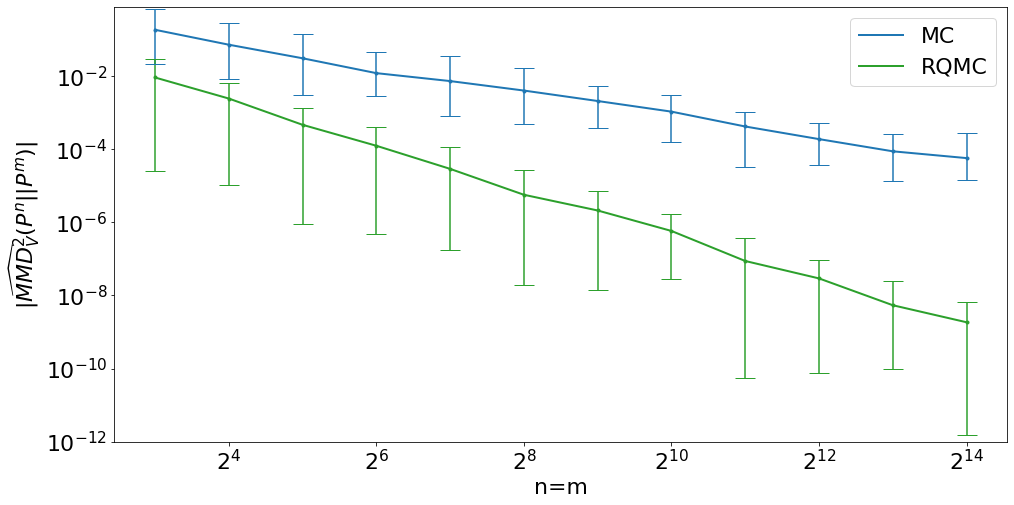

In [ ]:
if mc_all:
  plot_mmd_conv(d,(16,8),mmd_mc,mmd_qmc,mmd_rqmc,'MC','QMC','RQMC',mmd_min_mc,mmd_max_mc,mmd_min_rqmc,mmd_max_rqmc,'gaussian',stat_type,mmd_all_mc,15)
else:
  plot_mmd_conv(d,(16,8),mmd_mc,mmd_qmc,mmd_rqmc,'MC','QMC','RQMC',mmd_min_mc,mmd_max_mc,mmd_min_rqmc,mmd_max_rqmc,'gaussian',stat_type)

In [ ]:
if lattice:
  np.savez(path+"gaussian_mmd2_n_d=1_%sstat_k%s_latticeorder%s.npz" %(stat_type,kernel,order), mmd_mc=mmd_mc,mmd_min_mc=mmd_min_mc,mmd_max_mc=mmd_max_mc,mmd_rqmc=mmd_rqmc,mmd_min_rqmc=mmd_min_rqmc,mmd_max_rqmc=mmd_max_rqmc,mmd_qmc=mmd_qmc)
else:
  np.savez(path+"gaussian_mmd2_n_d=1_%sstat_k%s.npz" %(stat_type,kernel), mmd_mc=mmd_mc,mmd_min_mc=mmd_min_mc,mmd_max_mc=mmd_max_mc,mmd_rqmc=mmd_rqmc,mmd_min_rqmc=mmd_min_rqmc,mmd_max_rqmc=mmd_max_rqmc,mmd_qmc=mmd_qmc)

Calculate MMD$^2$ approximation for fixed $n$ and varying $d$:

In [ ]:
np.random.seed(11)

In [ ]:
n = 2**13                                       # number of simulated samples
d = [1,5,10,15,20,25,50,75,100,150,200,300]           # dimensions of data
num = 25                                        # numbers of repetitions for MC and RQMC
theta = np.ones(np.max(d))                      # true theta
s = 2                                           # standard deviation of the model
kernel = 'gaussian'                               # 'gaussian' or 'imq' or 'matern'
l = 1.5                                         # lengthscale for Gaussian kernel (l=-1 for median heuristic)
c = 1                                           # parameter c for IMQ kernel
b = -0.5                                        # parameter beta for IMQ kernel
nu = 7/2                                        # parameter nu for Matern kernel
inv = True                                      # True: use inverse transform, False: use Box-Muller transform
mc_all = False                                  # True: also output all MC draws; False: only output min, max and mean
stat_type = 'v'                                 # 'v' for V-statistic, 'u' for U-statistic
ladapt = True                                   # True: lengthscale proportional to d**(1/2)
lattice = False                                  # True: lattice, False: Halton
order = 1                                       # 1: order-1 lattice, 2: order-2 lattice, 8: order-8 lattice
sobol = True                                    # 'True': Sobol points, 'False': Halton sequence

In [ ]:
if lattice:
  if order==1:
    qmc = qmcpy.Lattice(np.max(d))
    qmc_1 = qmcpy.Lattice(np.max(d)+1)
  if order==2:
    qmc = qmcpy.Lattice(np.max(d),z_path=z_path+'lattice_vec.600.20.npy')
    qmc_1 = qmcpy.Lattice(np.max(d)+1,z_path=z_path+'lattice_vec.600.20.npy')
  if order==8:
    qmc = qmcpy.Lattice(np.max(d),z_path=z_path+'lattice_vec.600.13.npy')
    qmc_1 = qmcpy.Lattice(np.max(d)+1,z_path=z_path+'lattice_vec.600.13.npy')
else:
  if sobol:
    qmc = qmcpy.Sobol(np.max(d))
    qmc_1 = qmcpy.Sobol(np.max(d)+1) # for odd numbers of parameters
  else:
    qmc = qmcpy.Halton(np.max(d))
    qmc_1 = qmcpy.Halton(np.max(d)+1) # for odd numbers of parameters

In [ ]:
if mc_all:
  mmd_mc,mmd_qmc,mmd_rqmc,mmd_min_mc,mmd_max_mc,mmd_min_rqmc,mmd_max_rqmc,mmd_all_mc = mmd_conv_d('gaussian',n,num,d,l,c,b,nu,kernel,stat_type,theta,s,mc_all=mc_all,ladapt=ladapt,lattice=lattice,order=order,sobol=sobol,z_path=z_path)
else:
  mmd_mc,mmd_qmc,mmd_rqmc,mmd_min_mc,mmd_max_mc,mmd_min_rqmc,mmd_max_rqmc = mmd_conv_inv_d('gaussian',n,num,d,l,c,b,nu,kernel,stat_type,theta,s,ladapt=ladapt,lattice=lattice,order=order,sobol=sobol,z_path=z_path)

number of dimensions:  1
number of dimensions:  5
number of dimensions:  10
number of dimensions:  15
number of dimensions:  20
number of dimensions:  25
number of dimensions:  50
number of dimensions:  75
number of dimensions:  100
number of dimensions:  150
number of dimensions:  200
number of dimensions:  300


Plot the MMD$^2$ approximation against $n$:

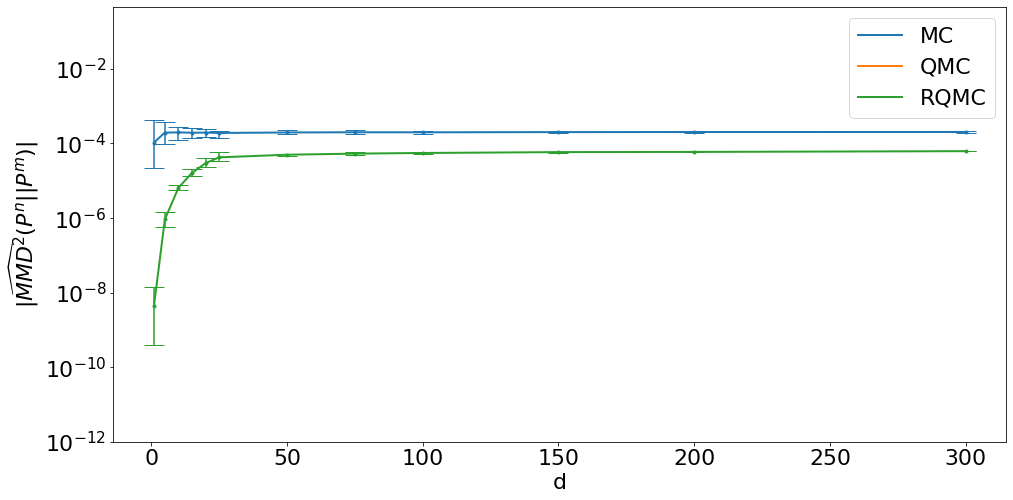

In [ ]:
if mc_all:
  plot_mmd_conv_d(d,(16,8),mmd_mc,mmd_qmc,mmd_rqmc,'MC','QMC','RQMC',mmd_min_mc,mmd_max_mc,mmd_min_rqmc,mmd_max_rqmc,'gaussian',stat_type_mmd_all_mc,15)
else:
  plot_mmd_conv_d(d,(16,8),mmd_mc,mmd_qmc,mmd_rqmc,'MC','QMC','RQMC',mmd_min_mc,mmd_max_mc,mmd_min_rqmc,mmd_max_rqmc,'gaussian',stat_type)

In [ ]:
if lattice:
  if ladapt:
    np.savez(path+"gaussian_mmd2_d_n=8192_%sstat_k%s_ladapt_latticeorder%s.npz" %(stat_type,kernel,order), mmd_mc=mmd_mc,mmd_min_mc=mmd_min_mc,mmd_max_mc=mmd_max_mc,mmd_rqmc=mmd_rqmc,mmd_min_rqmc=mmd_min_rqmc,mmd_max_rqmc=mmd_max_rqmc,mmd_qmc=mmd_qmc)
  else:
    np.savez(path+"gaussian_mmd2_d_n=8192_%sstat_k%s_latticeorder%s.npz" %(stat_type,kernel,order), mmd_mc=mmd_mc,mmd_min_mc=mmd_min_mc,mmd_max_mc=mmd_max_mc,mmd_rqmc=mmd_rqmc,mmd_min_rqmc=mmd_min_rqmc,mmd_max_rqmc=mmd_max_rqmc,mmd_qmc=mmd_qmc)
else:
  if ladapt:
    np.savez(path+"gaussian_mmd2_d_n=8192_%sstat_k%s_ladapt.npz" %(stat_type,kernel), mmd_mc=mmd_mc,mmd_min_mc=mmd_min_mc,mmd_max_mc=mmd_max_mc,mmd_rqmc=mmd_rqmc,mmd_min_rqmc=mmd_min_rqmc,mmd_max_rqmc=mmd_max_rqmc,mmd_qmc=mmd_qmc)
  else:
    np.savez(path+"gaussian_mmd2_d_n=8192_%sstat_k%s.npz" %(stat_type,kernel), mmd_mc=mmd_mc,mmd_min_mc=mmd_min_mc,mmd_max_mc=mmd_max_mc,mmd_rqmc=mmd_rqmc,mmd_min_rqmc=mmd_min_rqmc,mmd_max_rqmc=mmd_max_rqmc,mmd_qmc=mmd_qmc)